In [1]:
import numpy as np

## 주성분 분석(PCA) 실습
#### -선형대수 응용 수업-

In [2]:
## --Input dataset
x = np.array([2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1])
y = np.array([2.4,0.7,2.9,2.2,3.0,2.7,1.6,1.1,1.6,0.9])

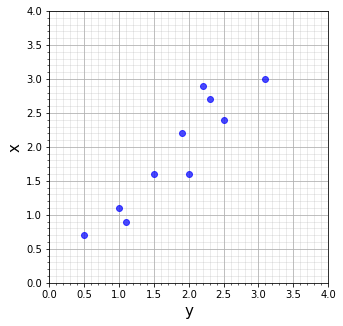

In [3]:
# Visualize original dataset
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (5,5)
plt.plot(x,y,'o',color='b',alpha=0.7)
plt.ylabel('x',fontsize=15)
plt.xlabel('y',fontsize=15)
plt.xlim([0,4])
plt.ylim([0,4])
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle='-',alpha=0.3)
plt.minorticks_on()


In [4]:
## --Calculate the Covariant matrix

# Zero-mean data
x_zero = x - np.mean(x)
y_zero = y - np.mean(y)

# Concatenate two vector into one matrix
xy = np.stack([x_zero,y_zero],axis=0)
print(" ### --- Zero mean --- ###")
print(xy)

# Covariant matrix
cov = np.cov(xy)
print(" ### --- Covariant matrix --- ###")
print(cov)

 ### --- Zero mean --- ###
[[ 0.69 -1.31  0.39  0.09  1.29  0.49  0.19 -0.81 -0.31 -0.71]
 [ 0.49 -1.21  0.99  0.29  1.09  0.79 -0.31 -0.81 -0.31 -1.01]]
 ### --- Covariant matrix --- ###
[[0.61655556 0.61544444]
 [0.61544444 0.71655556]]


---
### Eigen value, vector 계산  
#### 1. covariance matrix  
$cov = \left[\begin{array}{rrr} 
a&b\\
b&c\\
\end{array}\right]$  

  
#### 2. Eigenvalue calculation  
$\lambda$ : Eigen value  
$|cov - \lambda I| = det\left[\begin{array}{rrr} 
a-\lambda&b\\
b&c-\lambda\\
\end{array}\right] = 0$   
  
$\lambda = {(a+c) \pm \sqrt{(a+c)^2-4(ac-b^2)} \over 2a}$  

#### 3. Eigenvector calculation  
$\left[\begin{array}{rrr} 
a'&b\\
b&c'\\
\end{array}\right]\left[\begin{array}{rrr} 
x1\\
x2\\
\end{array}\right] = 0$  
  
    
 x1 = -x2 $( b + c' ) \over ( a' + b )$  
 eigen vector =$\left[\begin{array}{rrr} 
-(b+c')\\
a'+b\\
\end{array}\right]$

In [5]:
## --Calculation of eigen value,vector

# 1. Find eigen value
a = cov[0,0]; b = cov[1,0]; c = cov[1,1];

eig_val1 =    (a+c)/2. - np.sqrt((a+c)*(a+c) - 4*(a*c - b*b)) / 2.
eig_val2 =    (a+c)/2. + np.sqrt((a+c)*(a+c) - 4*(a*c - b*b)) / 2. 

print(" ### --- Eigen values --- ###")
print(eig_val1,eig_val2)

# 2. Find eigen vector

# -- eig_val1
a1 = a - eig_val1
c1 = c - eig_val1
#print(a1)
#print(c1)

eig_vec1 = np.array([-1 * (b+c1) ,(a1+b)])


# -- eig_val2  --->  PC1: Eigen vector of largest eigne values 
a2 = a - eig_val2
c2 = c - eig_val2
#print(a2)
#print(c2)

eig_vec2 = np.array([-1 * (b+c2) ,(a2+b)])

print(" ### --- Eigen vector --- ###")
print(eig_vec1)
print(eig_vec2)

print(" ### --- PC matrix --- ###")
PC_mat = np.column_stack((eig_vec2,eig_vec1))
print(PC_mat)

 ### --- Eigen values --- ###
0.04908339893832725 1.2840277121727839
 ### --- Eigen vector --- ###
[-1.2829166  1.1829166]
[-0.04797229 -0.05202771]
 ### --- PC matrix --- ###
[[-0.04797229 -1.2829166 ]
 [-0.05202771  1.1829166 ]]


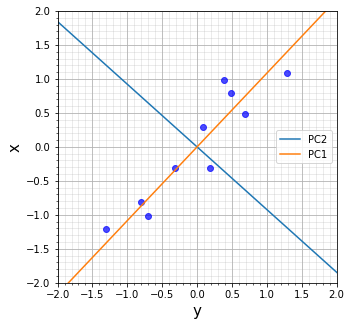

In [6]:
## Visualize eigen vectors
slope1 = eig_vec1[1] / eig_vec1[0]
slope2 = eig_vec2[1] / eig_vec2[0]

vec1_x = [a for a in range(-8,8)]
vec1_y = [slope1*b for b in range(-8,8)]


vec2_x = [a for a in range(-8,8)]
vec2_y = [slope2*b for b in range(-8,8)]

plt.rcParams['figure.figsize'] = (5,5)
plt.plot(x_zero,y_zero,'o',color='b',alpha=0.7)
plt.plot(vec1_x,vec1_y,label='PC2')
plt.plot(vec2_x,vec2_y,label='PC1')
plt.ylabel('x',fontsize=15)
plt.xlabel('y',fontsize=15)
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle='-',alpha=0.3)
plt.minorticks_on()
plt.legend()

In [13]:
PCA = PC_mat.T @ xy 
print("### --- Principle component ---- ###")
print(PCA)

PCA_x = PCA[0]
PCA_y = PCA[1]

### --- Principle component ---- ###
[[-0.05859446  0.12579723 -0.07021663 -0.01940554 -0.11859446 -0.06460831
   0.00701386  0.081       0.031       0.08660831]
 [-0.30558332  0.24929166  0.67074996  0.22758332 -0.36558332  0.30587498
  -0.6104583   0.081       0.031      -0.28387498]]


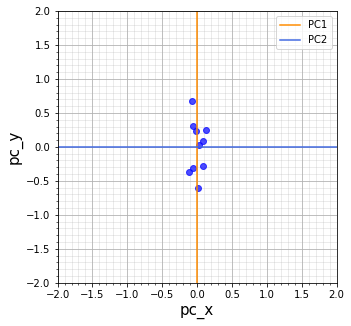

In [29]:
## Visualize PC
line1y = [b for b in range(-8,8)]
line1x = np.zeros(16)

line2x = [b for b in range(-8,8)]
line2y = np.zeros(16)

plt.rcParams['figure.figsize'] = (5,5)
plt.plot(PCA_x,PCA_y,'o',color='b',alpha=0.7)
plt.plot(line1x,line1y,label='PC1',color='darkorange')
plt.plot(line2x,line2y,label='PC2',color='royalblue')
plt.xlabel('pc_x',fontsize=15)
plt.ylabel('pc_y',fontsize=15)
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle='-',alpha=0.3)
plt.minorticks_on()
plt.legend()